In [2]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
import itertools

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, silhouette_samples, pairwise_distances

SEED = 123
N_SAMPLES = 10000
N_FEATURES = 2
N_CENTERS = 5
np.random.seed(SEED)

# Find the k

## Elbow method

#### The main object is to see which clusters reduce the inertia the most, and the next cluster doesn't provide much improvement to the inertia (hence, the elbow shape).

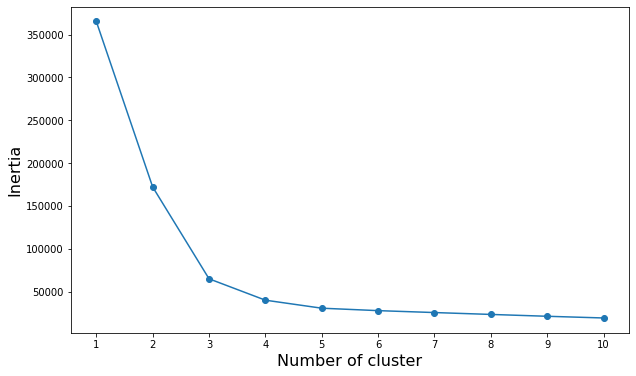

In [3]:
inertia = {}
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, max_iter=1000, random_state=SEED).fit(X)
    inertia[k] = kmeans.inertia_ 

plt.figure(figsize=(10, 6))
plt.plot(list(inertia.keys()), list(inertia.values()), marker='o')
plt.xlabel("Number of cluster", fontsize=16)
plt.ylabel("Inertia", fontsize=16)
plt.xticks(list(inertia.keys()))
plt.show();

In [4]:
def fit_and_predict(data, n_clusters, random_state=SEED):
    """
    Function to fit and predict the K-means clustering
    """
    km = KMeans(n_clusters=n_clusters, max_iter=300, 
                random_state=random_state, init='k-means++').fit(data)
    y_pred = km.fit_predict(X)
    return y_pred, km

def plot_data_with_cluster(data, pred, n_clusters, km):
    """
    Function
    """
    _cycols = itertools.cycle('bgcmywk')
    _marker = itertools.cycle((',', '+', '.', 'o', '*')) 
    plt.figure(figsize=(8, 8))
    for i in np.unique(pred):
        plt.scatter(
            data[pred == i, 0], data[pred == i, 1],
            s=50, c=next(_cycols),
            marker=next(_marker), edgecolor='black',
            alpha=.5, label='cluster {:d}'.format(i)
        )
        
    plt.scatter(
        km.cluster_centers_[:, 0], km.cluster_centers_[:, 1],
        s=300, marker='*',
        c='red', edgecolor='black', label='Centroids'
    )
    plt.legend(scatterpoints=1)
    plt.legend(loc='best')
    plt.show()
    return None

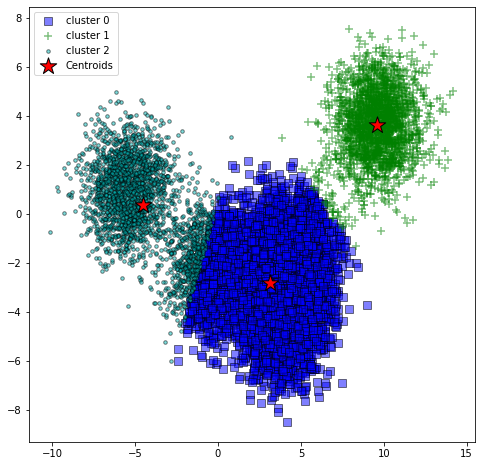

In [5]:
y_pred_elbow, elbow_model = fit_and_predict(X, 3)
plot_data_with_cluster(X, y_pred_elbow, 3, elbow_model)

## Silhouette score

#### Read here for the score definition.

#### The Silhouette plots are modified from this scikit-learn page.

In [6]:
sil_scor = {}
for n_clusters in range(2, 11):
    cluster_pred, km_model = fit_and_predict(X, n_clusters)
    silhouette_avg = silhouette_score(X, cluster_pred)
    print('For n_clusters = {0:d}, the silhouette score is {1:.4f}'.format(n_clusters, silhouette_avg))
    sil_scor[n_clusters] = silhouette_avg

For n_clusters = 2, the silhouette score is 0.4718
For n_clusters = 3, the silhouette score is 0.5791
For n_clusters = 4, the silhouette score is 0.5439
For n_clusters = 5, the silhouette score is 0.5104
For n_clusters = 6, the silhouette score is 0.4655
For n_clusters = 7, the silhouette score is 0.4117
For n_clusters = 8, the silhouette score is 0.3385
For n_clusters = 9, the silhouette score is 0.3235
For n_clusters = 10, the silhouette score is 0.3228


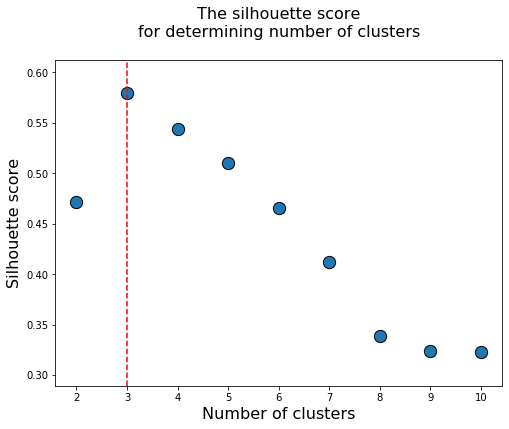

In [7]:
plt.figure(figsize=(8, 6))
plt.title("The silhouette score\nfor determining number of clusters\n",
          fontsize=16)
plt.scatter(list(sil_scor.keys()), list(sil_scor.values()), marker='o', s=150, edgecolor='k')
plt.xlabel("Number of clusters", fontsize=16)
plt.ylabel("Silhouette score", fontsize=16)
plt.xticks(list(sil_scor.keys()))
plt.axvline(x=max(sil_scor, key=sil_scor.get), color="red", linestyle="--")
plt.show();

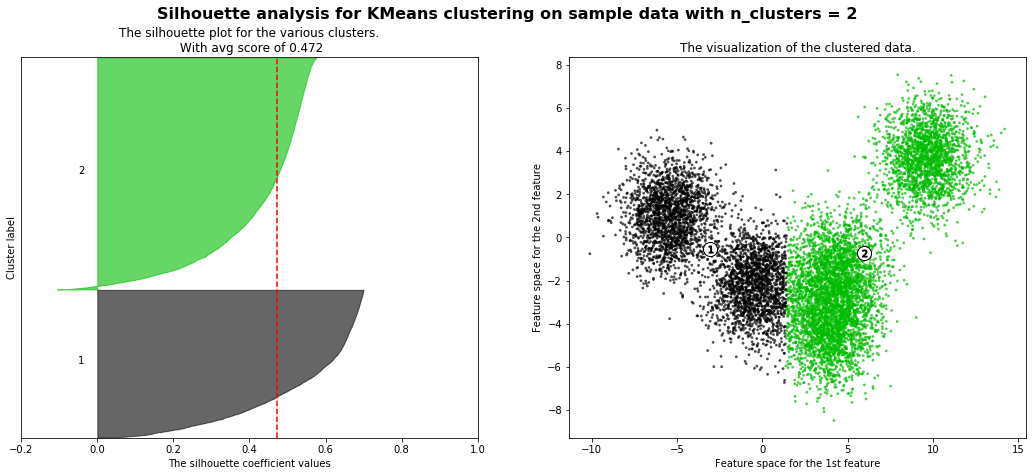

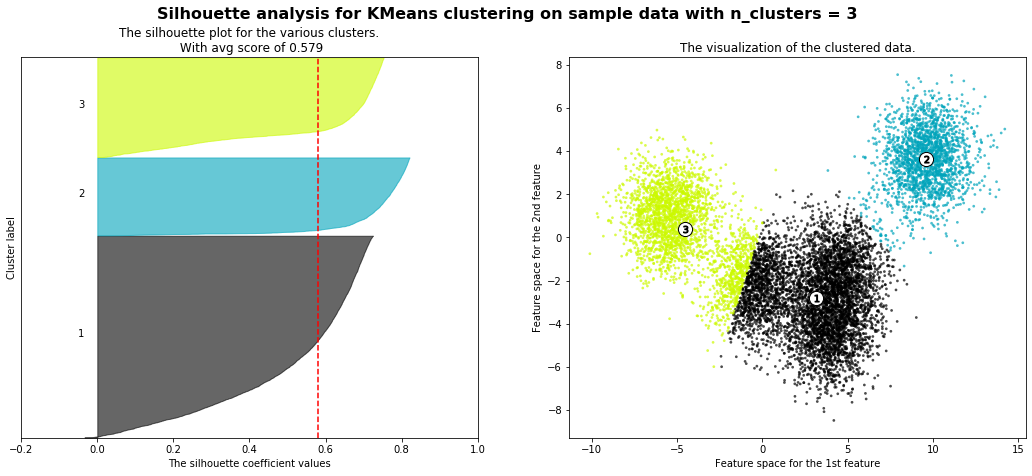

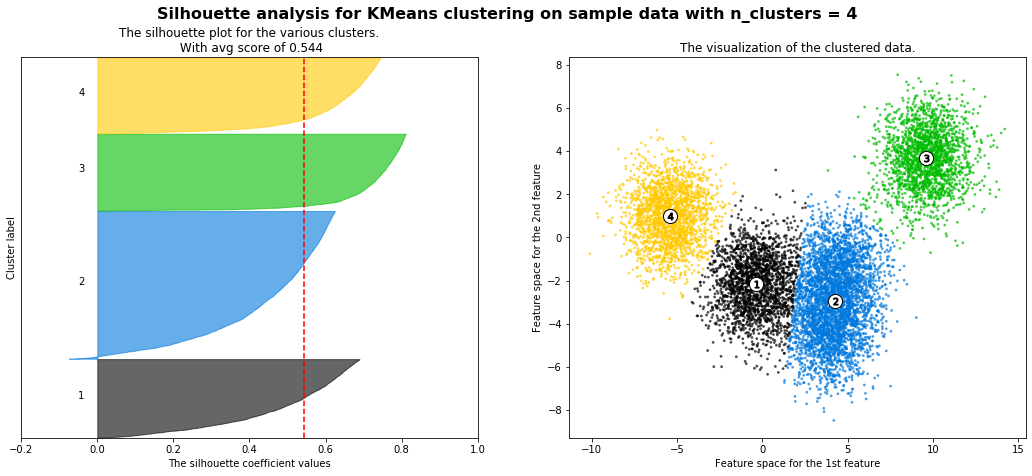

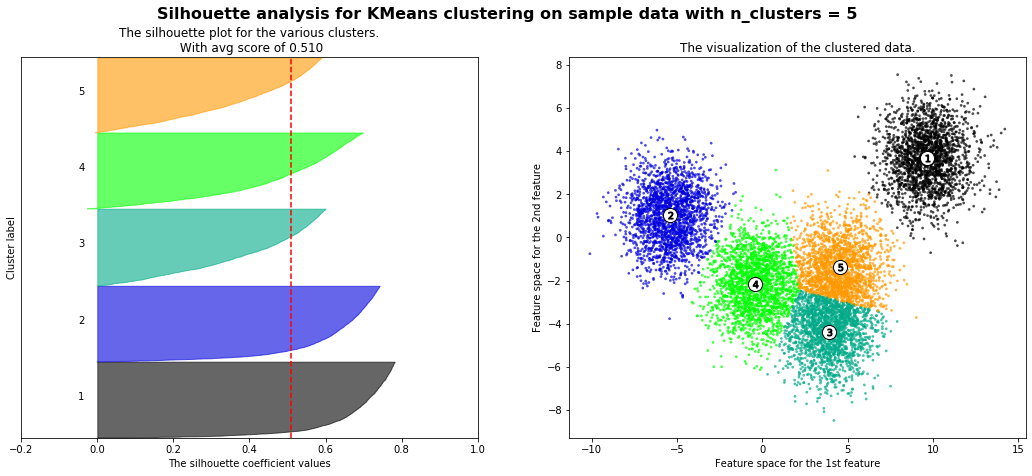

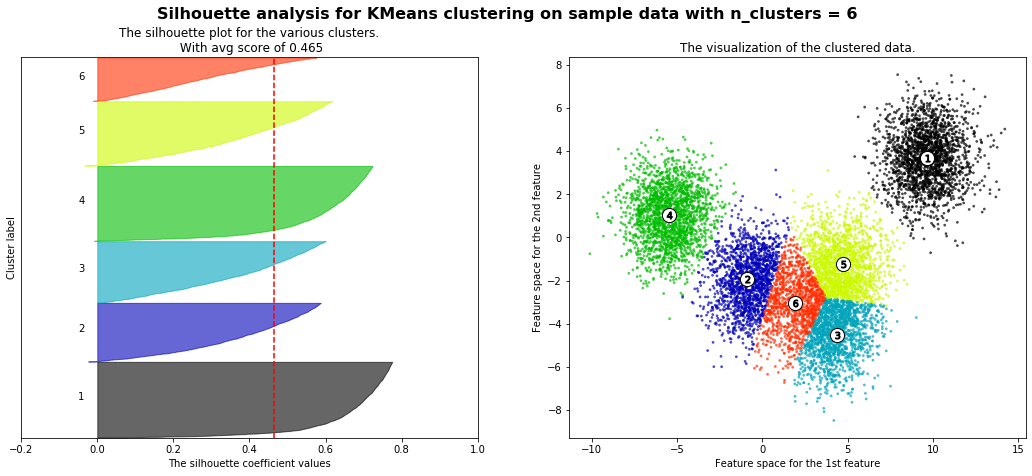

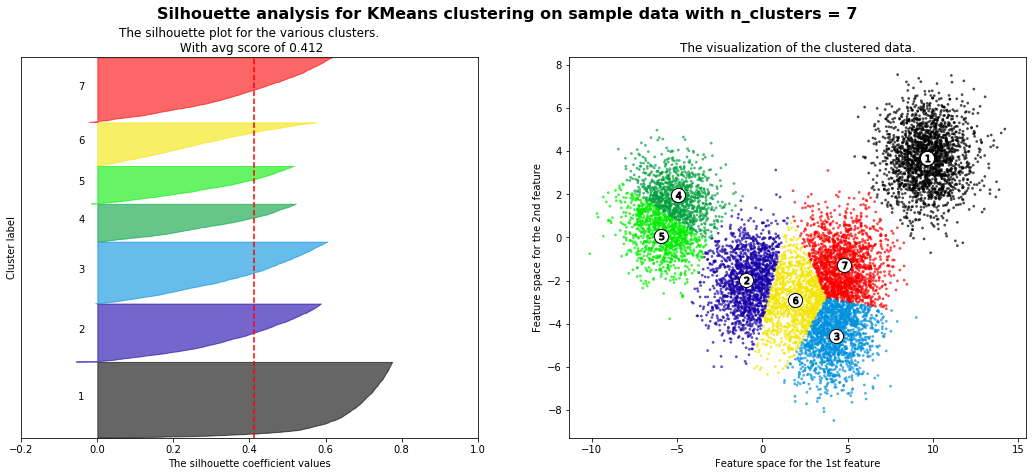

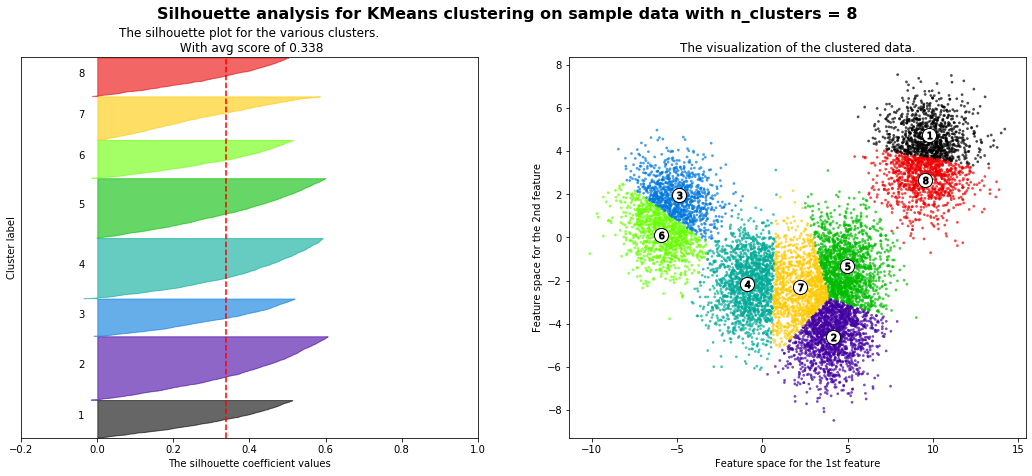

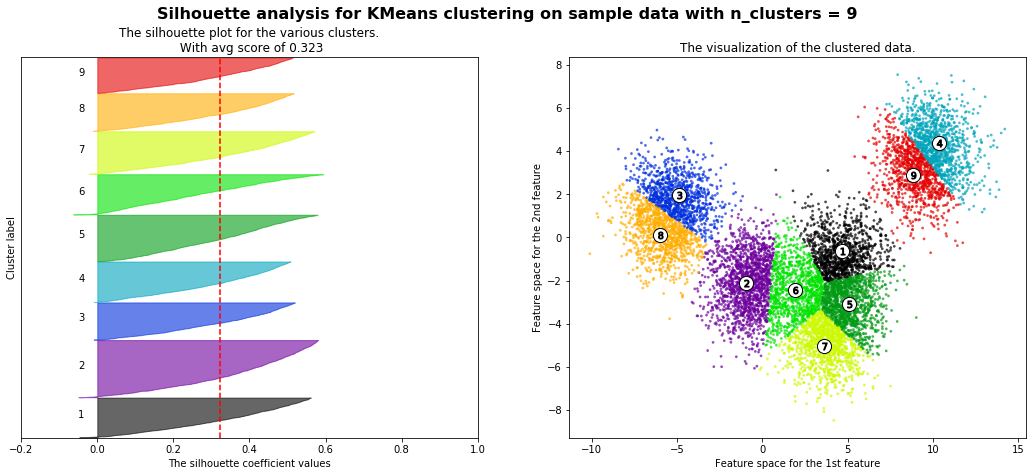

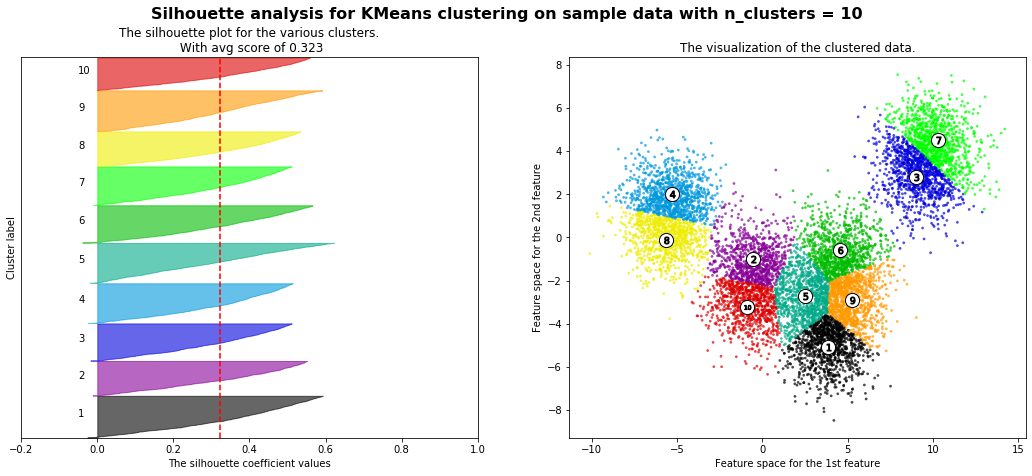

In [8]:
for n_clusters in range(2, 11):
    cluster_pred, km_model = fit_and_predict(X, n_clusters)
    silhouette_avg = silhouette_score(X, cluster_pred)  # compute the average score
    sample_silhouette_val = silhouette_samples(X, cluster_pred)  # compute by individual
    # Create a subplot with 1 row and 2 columns
    # The 1st subplot is the silhouette plot - the score has range of [-1, 1]
    # The 2nd subplot is the cluster visualization
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)
    ax1.set_xlim([-0.2, 1])
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])
    y_lower = 10
    for i in range(n_clusters):
        ith_cluster_silhouette_values = sample_silhouette_val[cluster_pred == i]
        ith_cluster_silhouette_values.sort()
        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i
        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.6)

        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i+1))
        y_lower = y_upper + 10 

    ax1.set_title("The silhouette plot for the various clusters.\n With avg score of {0:.3f}".
                  format(silhouette_avg))
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")
    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.2, 0, 0.2, 0.4, 0.6, 0.8, 1])
    colors = cm.nipy_spectral(cluster_pred.astype(float) / n_clusters)
    ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')
    centers = km_model.cluster_centers_  # Labeling the clusters
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')
    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % (i+1), alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")
    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=16, fontweight='bold')

plt.show();

## Gap Statistic Analysis

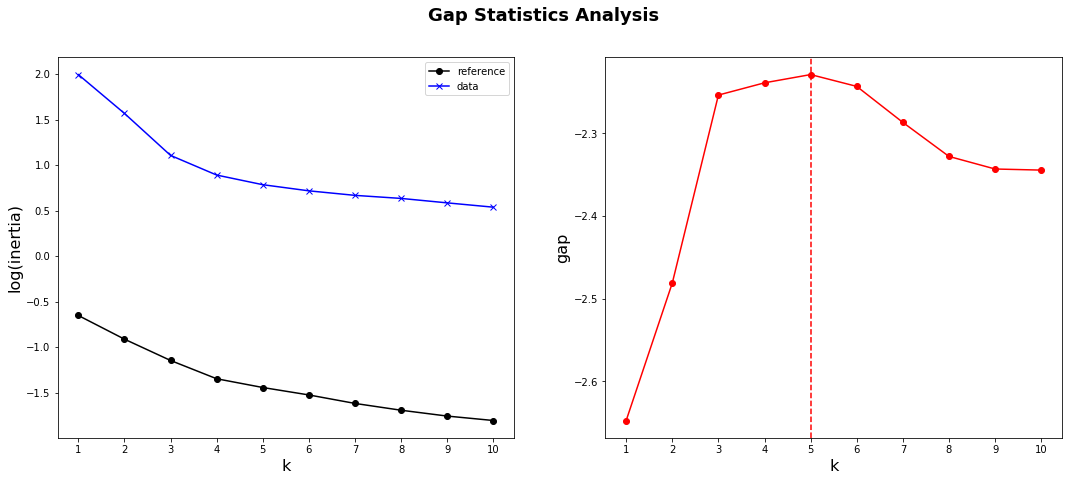

In [9]:
def compute_inertia(a, X):
    W = [np.mean(pairwise_distances(X[a == c, :])) for c in np.unique(a)]
    return np.mean(W)


def compute_gap(clustering, data, k_max=5, n_references=3):
    if len(data.shape) == 1:
        data = data.reshape(-1, 1)
        
    reference = np.random.rand(*data.shape)
    reference_inertia = []
    for k in range(1, k_max+1):
        local_inertia = []
        for _ in range(n_references):
            clustering.n_clusters = k
            assignments = clustering.fit_predict(reference)
            local_inertia.append(compute_inertia(assignments, reference))
        reference_inertia.append(np.mean(local_inertia))
    
    ondata_inertia = []
    for k in range(1, k_max+1):
        clustering.n_clusters = k
        assignments = clustering.fit_predict(data)
        ondata_inertia.append(compute_inertia(assignments, data))
        
    gap = np.log(reference_inertia)-np.log(ondata_inertia)
    return gap, np.log(reference_inertia), np.log(ondata_inertia)


k_max=10
gap, reference_inertia, ondata_inertia = compute_gap(KMeans(random_state=SEED), data=X, k_max=k_max)
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.set_size_inches(18, 7)
ax1.plot(range(1, k_max+1), reference_inertia, marker='o', color='black', label='reference')
ax1.plot(range(1, k_max+1), ondata_inertia, marker='x', color='blue', label='data')
ax1.set_xlabel('k', fontsize=16)
ax1.set_ylabel('log(inertia)', fontsize=16)
ax1.set_xticks(range(1, k_max+1))
ax1.legend(loc='best')
ax2.plot(range(1, k_max+1), gap, marker='o', color='red')
ax2.set_xlabel('k', fontsize=16)
ax2.set_ylabel('gap', fontsize=16)
ax2.set_xticks(range(1, k_max+1))
ax2.axvline(x=np.where(gap == np.amax(gap))[0] + 1, color="red", linestyle="--")
plt.suptitle("Gap Statistics Analysis", fontsize=18, fontweight='bold')
plt.show();

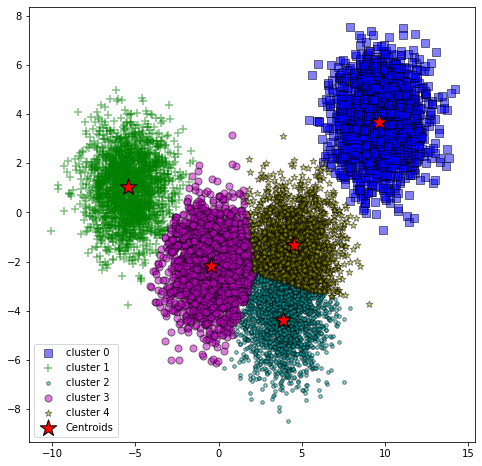

In [10]:
y_pred, km_model = fit_and_predict(X, 5)
plot_data_with_cluster(X, y_pred, 5, km_model)